In [1]:
# Install catalax
# !pip install catalax

In [2]:
import jax.numpy as jnp

import catalax as ctx
import catalax.identifiability as cid

# Enabling 64-bit precision is extremely important
# for sensitivity analysis due to many multiplications
# and divisions caused by auto-differentiation

ctx.enable_x64()

In [3]:
# Initialize the model
model = ctx.Model.load("./models/identifiability.json")

# Retrieve initial conditions from an .npy file
initial_conditions = model.y0_array_to_dict(
    jnp.load("./data/y0s_ident.npy"),
)

model

Model summary


Eq(x, Matrix([[s0, s1, s2, s3]]))

Eq(theta, Matrix([[K_si, k4, K_p, K_s, k5, k2, K_pg, k3, K_n, k_d, k_4b, k6]]))

Eq(Derivative(PGME, t), 0.0002*(k3 + k5*s1/K_n)*(k2*s0/K_s + k_4b*s2/K_p)*exp(-k_d*t)/((k3 + k6*s0/K_si + k4*s1/K_n + k5*s1/K_n)*(1 + k2*s0*(1 + s0/K_si + s1/K_n)/(K_s*(k3 + k6*s0/K_si + k4*s1/K_n + k5*s1/K_n)) + s0**2/(K_s*K_si) + s3/K_pg + s2/K_p + s1/K_n)) - 0.0002*(k2*s0/K_s + k_4b*s2/K_p)*(k3 + k6*s0/K_si + k5*s1/K_n)*exp(-k_d*t)/((k3 + k6*s0/K_si + k4*s1/K_n + k5*s1/K_n)*(1 + k2*s0*(1 + s0/K_si + s1/K_n)/(K_s*(k3 + k6*s0/K_si + k4*s1/K_n + k5*s1/K_n)) + s0**2/(K_s*K_si) + s3/K_pg + s2/K_p + s1/K_n)) - 0.0002*k2*s0*exp(-k_d*t)/(K_s*(1 + k2*s0*(1 + s0/K_si + s1/K_n)/(K_s*(k3 + k6*s0/K_si + k4*s1/K_n + k5*s1/K_n)) + s0**2/(K_s*K_si) + s3/K_pg + s2/K_p + s1/K_n)))

Eq(Derivative(7 - ADCA, t), 0.0002*(k3 + k5*s1/K_n)*(k2*s0/K_s + k_4b*s2/K_p)*exp(-k_d*t)/((k3 + k6*s0/K_si + k4*s1/K_n + k5*s1/K_n)*(1 + k2*s0*(1 + s0/K_si + s1/K_n)/(K_s*(k3 + k6*s0/K_si + k4*s1/K_n + k5*s1/K_n)) + s0**2/(K_s*K_si) + s3/K_pg + s2/K_p + s1/K_n)) - 0.0002*k2*s0*exp(-k_d*t)/(K_s*(1 + k2*s0*(1 + s0/K_si + s1/K_n)/(K_s*(k3 + k6*s0/K_si + k4*s1/K_n + k5*s1/K_n)) + s0**2/(K_s*K_si) + s3/K_pg + s2/K_p + s1/K_n)))

Eq(Derivative(CEX, t), -0.0002*(k3 + k5*s1/K_n)*(k2*s0/K_s + k_4b*s2/K_p)*exp(-k_d*t)/((k3 + k6*s0/K_si + k4*s1/K_n + k5*s1/K_n)*(1 + k2*s0*(1 + s0/K_si + s1/K_n)/(K_s*(k3 + k6*s0/K_si + k4*s1/K_n + k5*s1/K_n)) + s0**2/(K_s*K_si) + s3/K_pg + s2/K_p + s1/K_n)) + 0.0002*k2*s0*exp(-k_d*t)/(K_s*(1 + k2*s0*(1 + s0/K_si + s1/K_n)/(K_s*(k3 + k6*s0/K_si + k4*s1/K_n + k5*s1/K_n)) + s0**2/(K_s*K_si) + s3/K_pg + s2/K_p + s1/K_n)))

Eq(Derivative(PG, t), 0.0002*(k2*s0/K_s + k_4b*s2/K_p)*(k3 + k6*s0/K_si + k5*s1/K_n)*exp(-k_d*t)/((k3 + k6*s0/K_si + k4*s1/K_n + k5*s1/K_n)*(1 + k2*s0*(1 + s0/K_si + s1/K_n)/(K_s*(k3 + k6*s0/K_si + k4*s1/K_n + k5*s1/K_n)) + s0**2/(K_s*K_si) + s3/K_pg + s2/K_p + s1/K_n)))

,name,symbol,value,constant,initial_value,equation,lower_bound,upper_bound
0,K_n,K_n,290.000000,False,None,None,None,None
1,K_p,K_p,39.000000,False,None,None,None,None
2,K_pg,K_pg,12.000000,False,None,None,None,None
3,K_s,K_s,14.000000,False,None,None,None,None
4,K_si,K_si,20.000000,False,None,None,None,None
5,k2,k2,432.000000,False,None,None,None,None
6,k3,k3,417.000000,False,None,None,None,None
7,k4,k4,73600.000000,False,None,None,None,None
8,k5,k5,491.000000,False,None,None,None,None
9,k6,k6,1660.000000,False,None,None,None,None


### Sensitivity matrix analysis

The identification of locally unidentifiable parameters in a system is a complex task, but there are different methods available to tackle it. One highly effective method is based on the work of [Joubert et al. (Scientific Reports, 2021)](https://www.nature.com/articles/s41598-021-96293-9). This method involves using a sensitivity matrix of perturbed parameter samples to integrate the system over time, followed by estimating the rank of the matrix using singular value decomposition (SVD) analysis. While numerical errors make it impossible to achieve perfect zeros (rank deficiency), a `gap` criteria is used to determine whether a singular value is at least $10^{gap}$ distant from another.

Once the rank deficiency is identified, the system can be considered locally unidentifiable. The next step involves identifying the parameters that are locally unidentifiable by observing the sensitivity matrix and identifying the parameters that are not sensitive to the perturbations. In the following section, we will demonstrate an example to clearly illustrate the criteria for local unidentifiability.


🚀 Sensitivity matrix analysis
│
├── t0/t1/steps: 0/1800/50
├── scale: 0.33/1.33
├── gap criteria: 10
├── n_samples: 50
│


╰── sampling:   0%|          | 0/50 [00:00<?, ?it/s]

╰── sampling: 100%|██████████| 50/50 [03:40<00:00,  4.42s/it]



🎉 Finished!


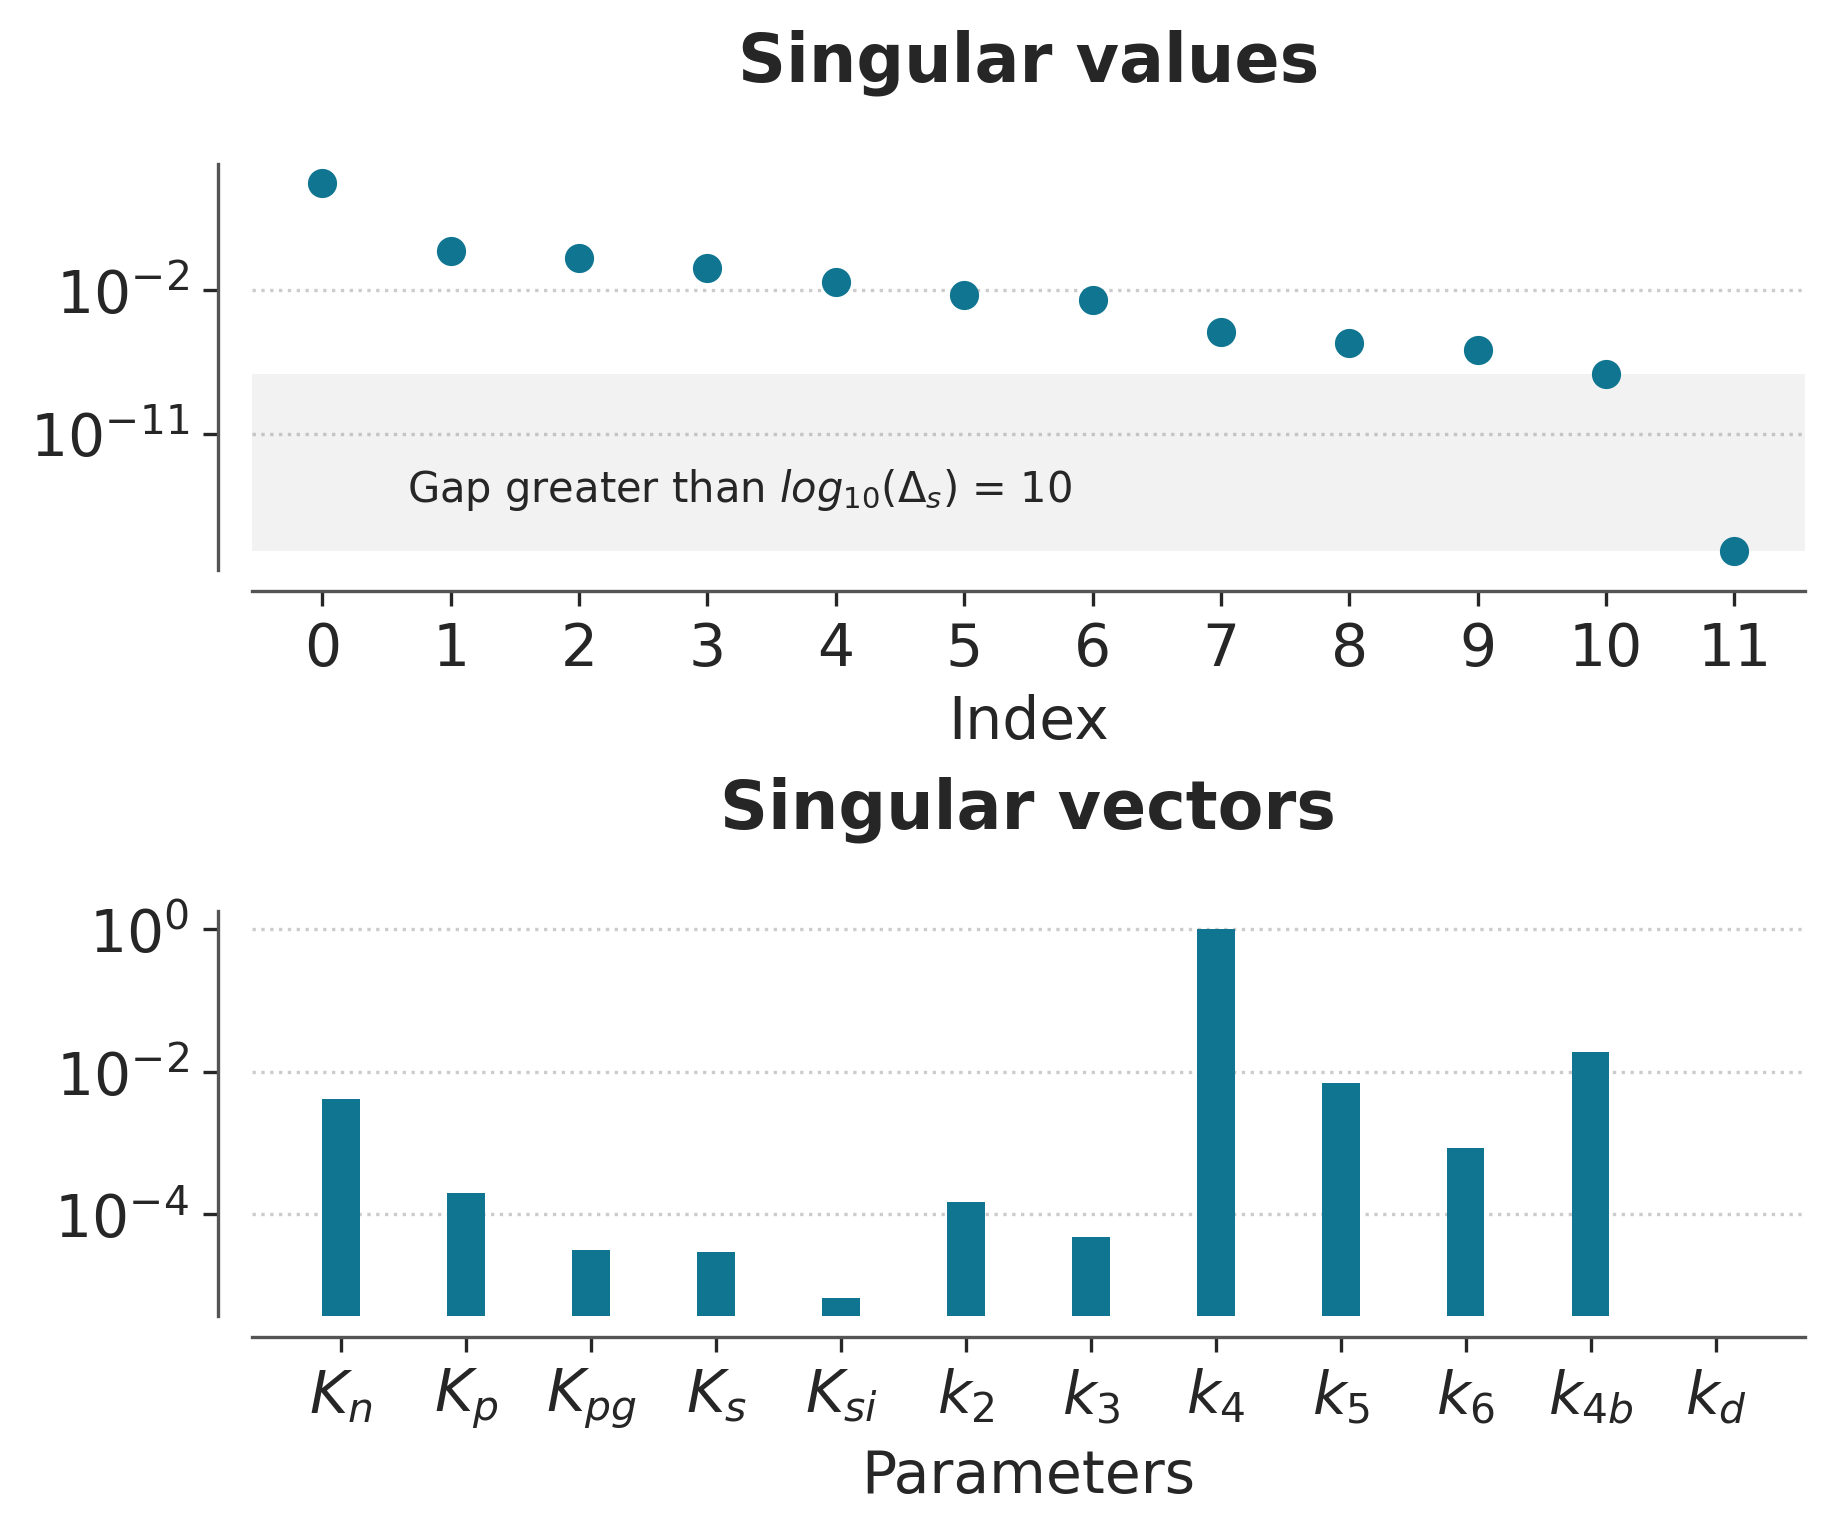

In [4]:
vh, singular_values, figure = cid.sensitivity_analysis(
    model=model,
    initial_conditions=initial_conditions,
    t0=0,
    t1=1800,
    nsamples=50,
    nsteps=50,
)